In [30]:
# import libraries
import os, sys
import matplotlib.pyplot as plt

# --- Configuration ---
sys.path.insert(0, '../../config')
from _utility_imports import *


In [31]:
filter_type = "true-wrong"
model_name = "lorenz96"
file_path = f"results/{filter_type}-{model_name}.h5"
datasets_tw = extract_datasets_from_h5(file_path)
t=datasets_tw['t']
statevec_true = datasets_tw['statevec_true']

Reading data from results/true-wrong-lorenz96.h5...
Dataset 'statevec_true' extracted with shape (3, 1001)
Dataset 't' extracted with shape (1001,)
Data extraction complete.


In [32]:
filter_type = "EnTKF"
file_path = f"results/{filter_type}-{model_name}.h5"
datasets = extract_datasets_from_h5(file_path)
statevec_ens_full = datasets["statevec_ens_full"]
statevec_ens_mean = datasets["statevec_ens_mean"] 
statevec_bg       = datasets["statevec_bg"]

Reading data from results/EnTKF-lorenz96.h5...
Dataset 'statevec_bg' extracted with shape (3, 1001)
Dataset 'statevec_ens_full' extracted with shape (3, 10, 1001)
Dataset 'statevec_ens_mean' extracted with shape (3, 1001)
Data extraction complete.


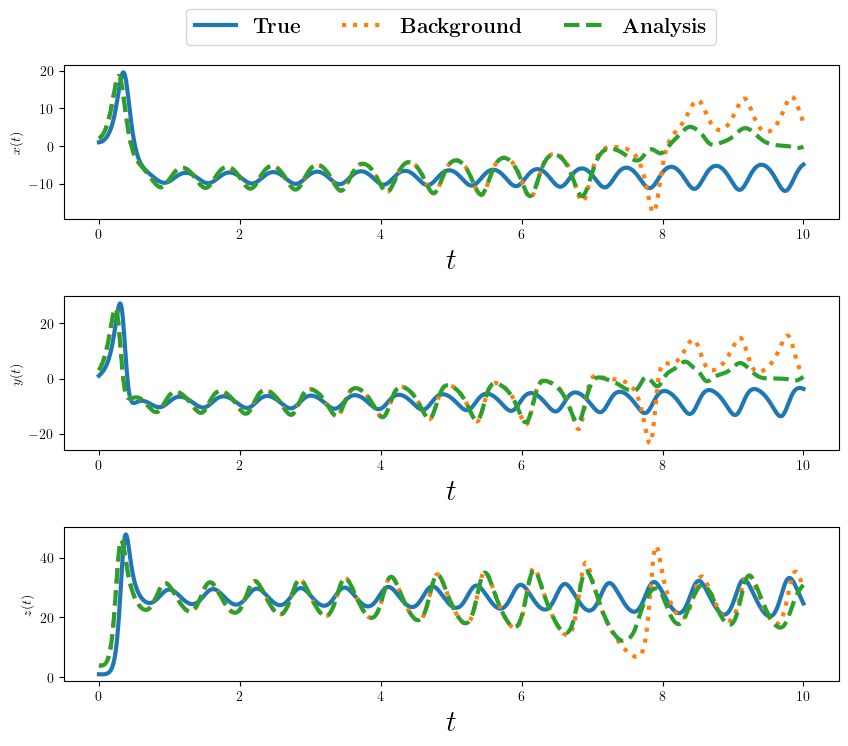

In [33]:
# ---plottings ---

plt.rcParams['text.usetex'] = True

font = {'family' : 'normal',
'weight' : 'bold',
'size' : 20}

# mpl.rc('font', **font)
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,8)) 
ax = ax.flat
for k in range(3):
    ax[k].plot(t,statevec_true[k,:], label=r'\bf{True}', linewidth = 3) 
    ax[k].plot(t,statevec_bg[k,:], ':', label=r'\bf{Background}', linewidth = 3) 
    # ax[k].plot(t[ind_m],w[k,:], 'o', fillstyle='none',  label=r'\bf{Observation}', markersize = 8, markeredgewidth = 2) 
    ax[k].plot(t,statevec_ens_mean[k,:], '--', label=r'\bf{Analysis}', linewidth = 3) 
    ax[k].set_xlabel(r'$t$',fontsize=22)
    # ax[k].axvspan(0, tm_m, color='y', alpha=0.4, lw=0)
ax[0].legend(loc="center", bbox_to_anchor=(0.5,1.25),ncol =4,fontsize=15) 
ax[0].set_ylabel(r'$x(t)$')
ax[1].set_ylabel(r'$y(t)$')
ax[2].set_ylabel(r'$z(t)$')
fig.subplots_adjust(hspace=0.5)